TITLE: ML PROJECT 

AUTHOR: FRANK SCARPA

LINK TO GITHUB: https://github.com/bankoscarpa/datafun-07-ml 

Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Part 1 - Chart a Straight Line


Text(0, 0.5, 'Celsius')

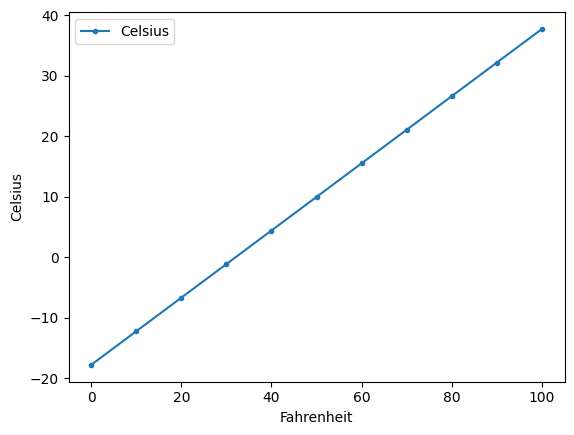

In [ ]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
axes.set_ylabel('Celsius')


## Part 2 - Prediction
### Section 1 - Data Acquisition


(10.0, 70.0)

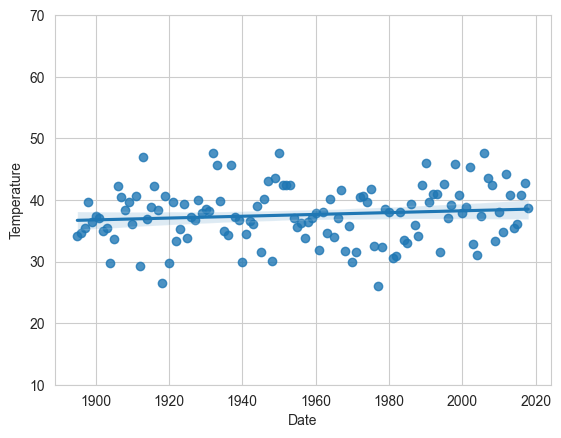

In [5]:
nyc_df = pd.read_csv('IntroToPython/examples/ch10/ave_hi_nyc_jan_1895-2018.csv')
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head()
nyc_df.tail()
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
slope = linear_regression.slope
intercept = linear_regression.intercept
slope * 2024 + intercept
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)


## Part 3 - Prediction (scikit-learn)


predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


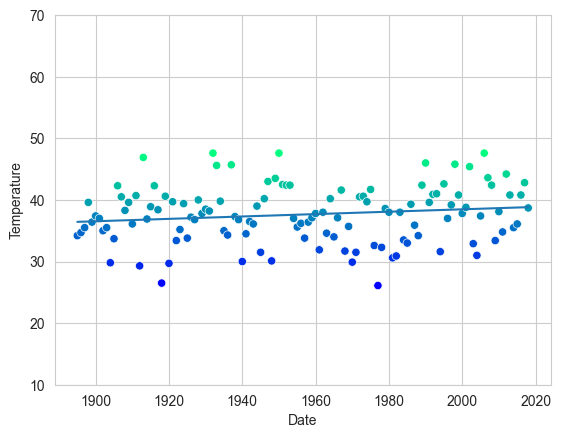

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11
)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

predicted = linear_regression.predict(X_test)
expected = y_test
for p,e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

linear_regression.coef_ * 2024 + linear_regression.intercept_
linear_regression.coef_ * 1890 + linear_regression.intercept_

axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = linear_regression.coef_ * x + linear_regression.intercept_
plt.plot(x, y)
